Not yet!!!!!!!!!!!!!!!!!!!!


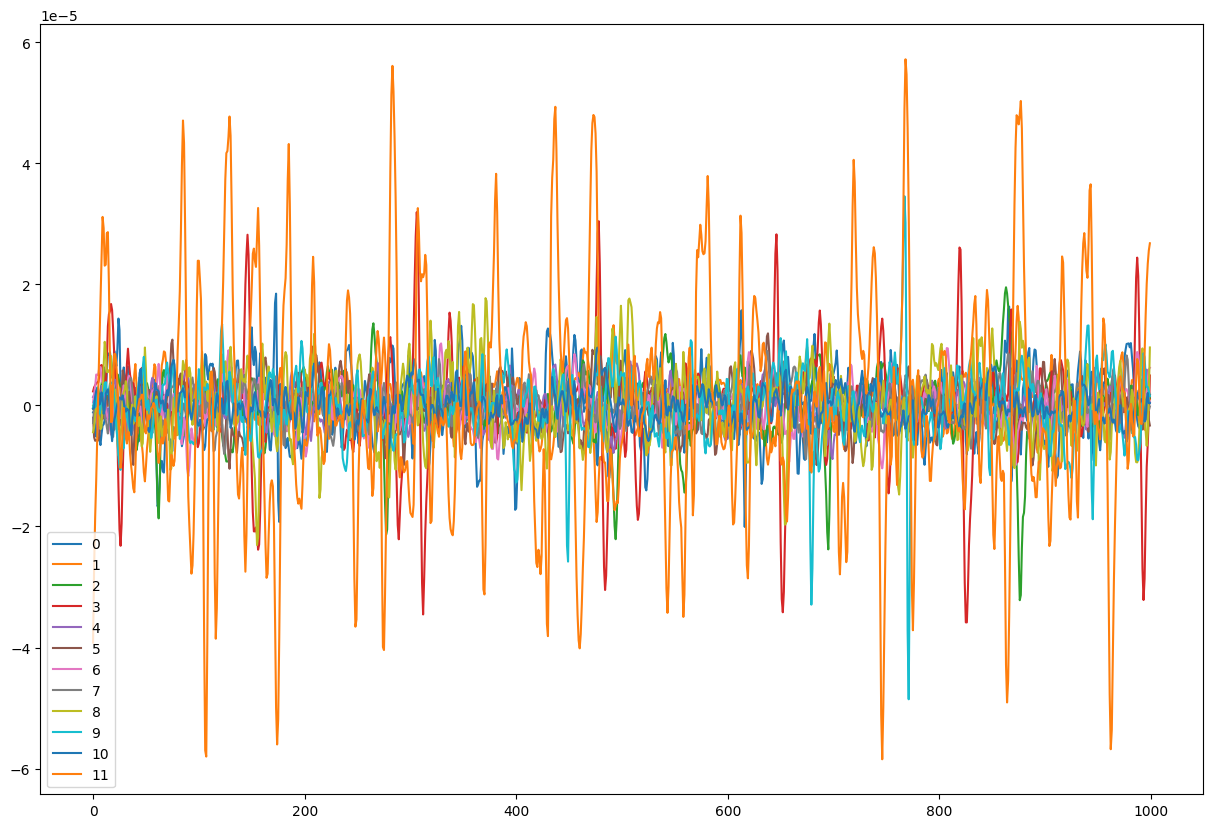

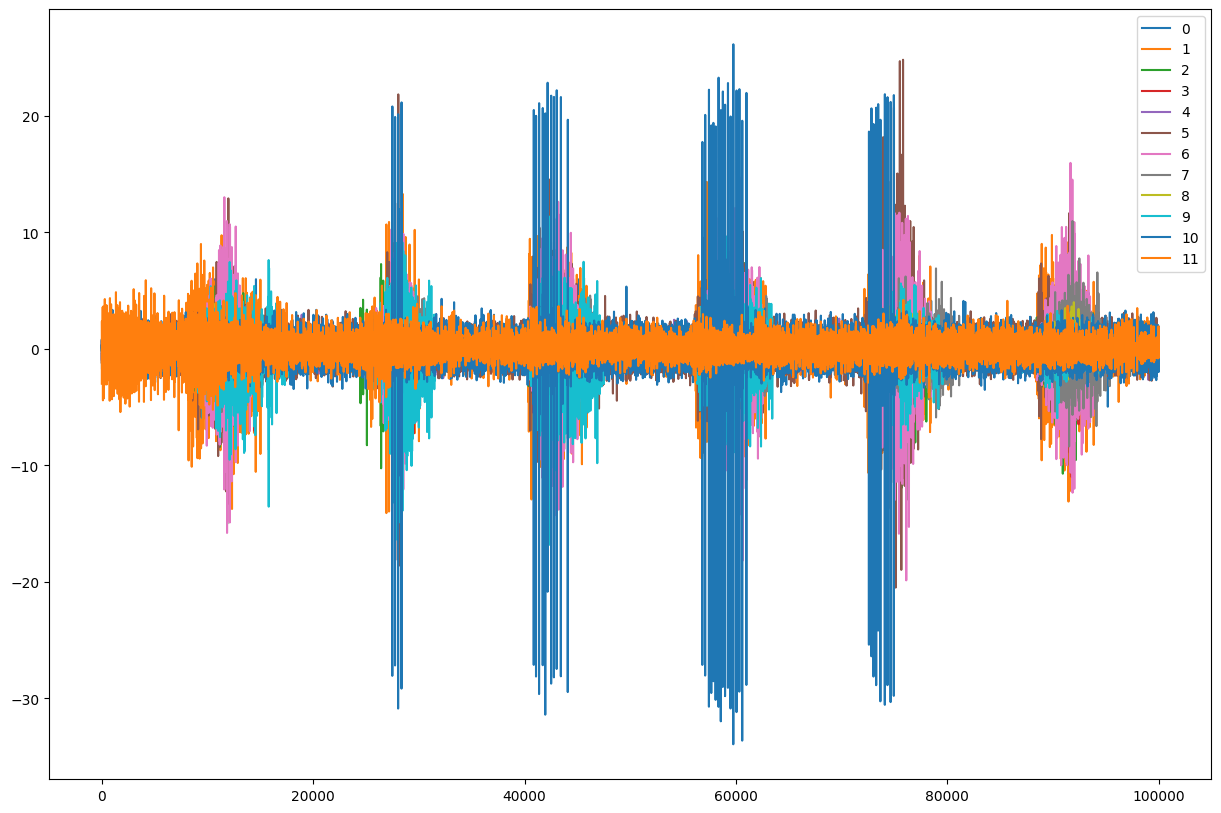

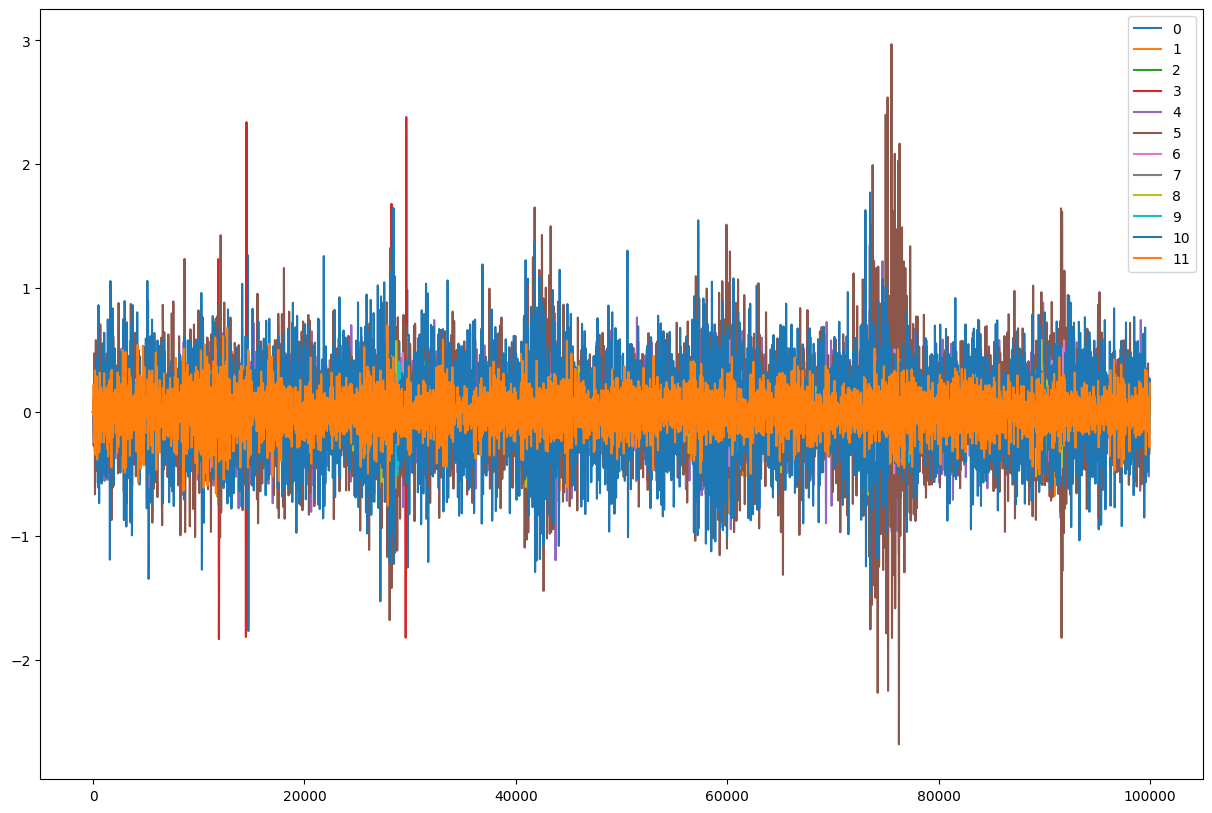

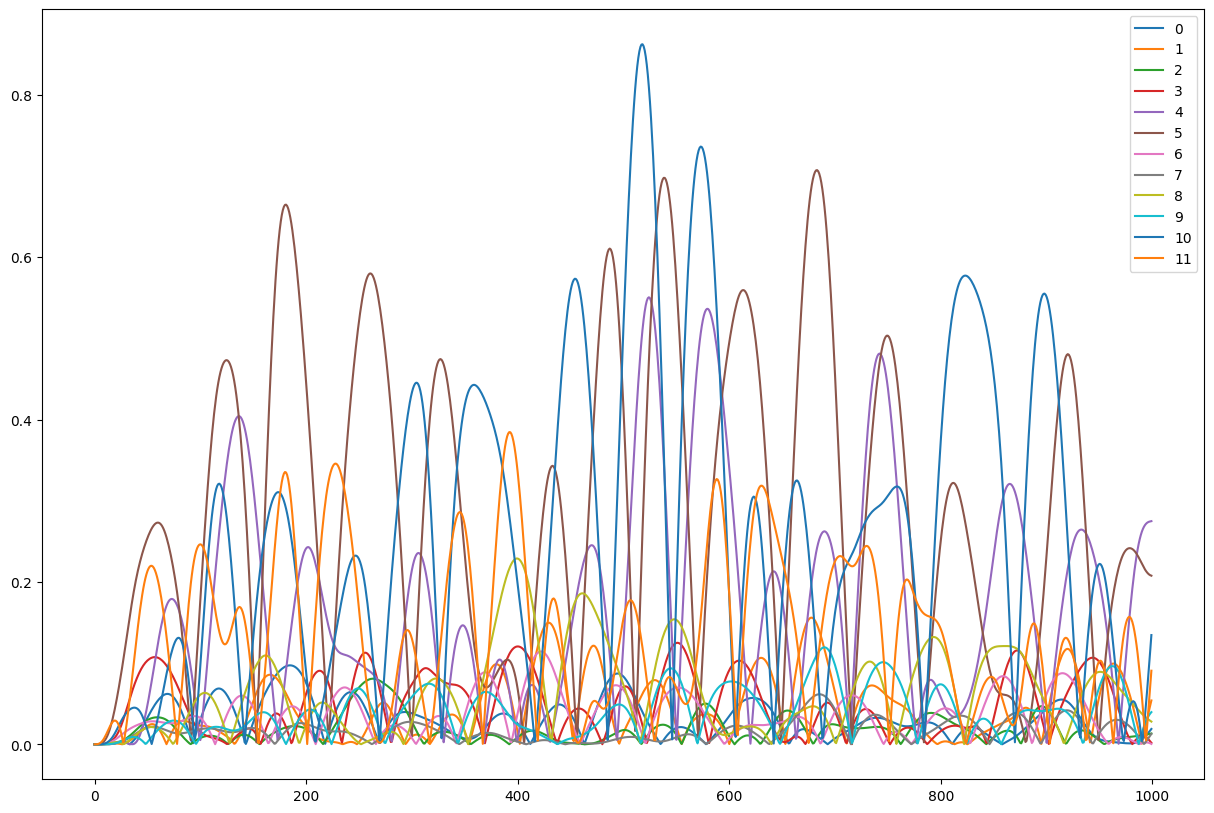

In [1]:
from DataProcess_emg import *
from LSTM import *
import torch


%matplotlib inline
data=Data(12,6)
data.get_data('/remote-home/2230728/project/EMG/NinaPro/DB2', 'S5_E3_A1.mat')
data.emg_signal[:1000].plot(figsize = (15,10))
data.normalise()
data.emg_signal[:100000].plot(figsize = (15,10))
data.filter_data(f=20, butterworth_order=4, btype='lowpass')
data.emg_signal[:100000].plot(figsize = (15,10))
data.rectify_data()
data.emg_signal[:1000].plot(figsize = (15,10))
x,y = data.windowing_data(200, 100)

In [2]:
from Feature import *

feature=feature(x)
feature.time_features_estimation(x, 200, 100, data.emg_raw)
print(feature.time_features_matrix.shape)

(8743, 8)
(0,)
(8743, 8)


In [4]:
print(feature.time_features_matrix.shape)
print(y.shape)

(8743, 8)
(8743, 6)


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model = MyModel(data.emg_channel, 200, data.force_channel)
loader = DatatoTorch(x.astype(np.float32), y.astype(np.float32), device)
train(model, loader, device, 2000)

cuda


/root/APP/miniconda3/envs/torch1.12-gpu/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 0, Loss: 1.020
Epoch: 1, Loss: 0.965
Epoch: 2, Loss: 0.929
Epoch: 3, Loss: 0.907
Epoch: 4, Loss: 0.885
Epoch: 5, Loss: 0.875
Epoch: 6, Loss: 0.856
Epoch: 7, Loss: 0.841
Epoch: 8, Loss: 0.836
Epoch: 9, Loss: 0.832
Epoch: 10, Loss: 0.827
Epoch: 11, Loss: 0.812
Epoch: 12, Loss: 0.808
Epoch: 13, Loss: 0.813
Epoch: 14, Loss: 0.801
Epoch: 15, Loss: 0.800
Epoch: 16, Loss: 0.792
Epoch: 17, Loss: 0.783
Epoch: 18, Loss: 0.788
Epoch: 19, Loss: 0.788
Epoch: 20, Loss: 0.773
Epoch: 21, Loss: 0.775
Epoch: 22, Loss: 0.792
Epoch: 23, Loss: 0.783
Epoch: 24, Loss: 0.767
Epoch: 25, Loss: 0.771
Epoch: 26, Loss: 0.758
Epoch: 27, Loss: 0.765
Epoch: 28, Loss: 0.761
Epoch: 29, Loss: 0.764
Epoch: 30, Loss: 0.759
Epoch: 31, Loss: 0.757
Epoch: 32, Loss: 0.755
Epoch: 33, Loss: 0.775
Epoch: 34, Loss: 0.755
Epoch: 35, Loss: 0.755
Epoch: 36, Loss: 0.746
Epoch: 37, Loss: 0.739
Epoch: 38, Loss: 0.759
Epoch: 39, Loss: 0.745
Epoch: 40, Loss: 0.742
Epoch: 41, Loss: 0.745
Epoch: 42, Loss: 0.749
Epoch: 43, Loss: 0.74

KeyboardInterrupt: 